<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

The following command line launches the parallel ipython cores:

In [ ]:
!ipcluster start -n 4

In [17]:
from nbtools import execute_in_parallel
from planet4 import io
db = io.DBManager()
data = db.get_image_id_markings('bo3')[:10]
def calc_stuff(fpath):
    d = {'path': fpath}
    d['length'] = len(pd.read_csv(fpath))
    return d
results = execute_in_parallel(calc_stuff, data)
df = pd.DataFrame(results.result)

In [32]:
from planet4 import markings, io, plotting
import seaborn as sns
sns.set_context('paper')

In [6]:
from planet4 import io
db= io.DBManager()
print(db.dbname)
data = db.get_image_id_markings('bo3')
print('Shape:',data.shape)

/Users/klay6683/local_data/planet4/2017-12-31_planet_four_classifications_queryable_cleaned_seasons2and3.h5
Shape: (273, 23)


In [9]:
from configparser import ConfigParser
config = ConfigParser()
config.read("/Users/klay6683/.pyciss.ini")
config['paths']['my_mac']

In [3]:
df = db.get_image_id_markings('6n3')

In [4]:
df.classification_id.nunique()

139

In [5]:
p4id = markings.ImageID('6n3')

In [6]:
%matplotlib inline

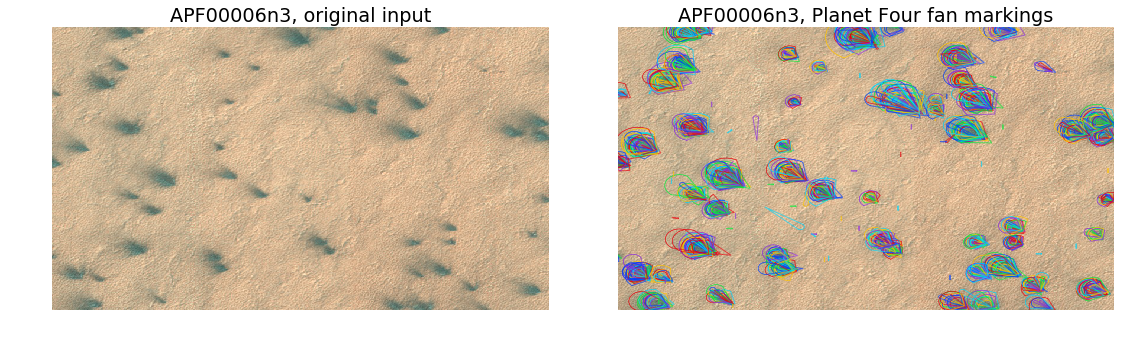

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(16,5))
p4id.show_subframe(ax[0])
p4id.plot_fans(lw=1, ax=ax[1])
fig.tight_layout()
ax[0].set_title(f"{p4id.imgid}, original input")
ax[1].set_title(f"{p4id.imgid}, Planet Four fan markings")
plt.savefig("/Users/klay6683/Dropbox/src/p4_paper1/figures/fan_markings.png",
            bbox_inches='tight',
            dpi=200)

In [9]:
print(id_.data.image_url.iloc[0])

http://www.planetfour.org/subjects/standard/50e740ee5e2ed211dc00210e.jpg


In [25]:
p4id = markings.ImageID('1aa')

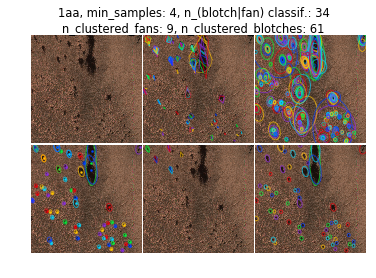

In [33]:
plotting.plot_image_id_pipeline('1aa', datapath='catalog_1.0b2', save=True, savetitle='pipeline',
                                saveroot='/Users/klay6683/Dropbox/src/p4_paper1/figures/')